In [1]:
# Import paket paket yang diperlukan
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('country_data.csv') 
df.head()

,gdp,sex_ratio,surface_area,life_expectancy_male,unemployment,imports,homicide_rate,currency,iso2,employment_services,...,pop_growth,region,pop_density,internet_users,gdp_per_capita,fertility,refugees,primary_school_enrollment_male,co2_emissions,tourists
0,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,39.4,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,15059.0,103.7,28748.0,76.7,12.8,5908.0,2.3,"{'code': 'ALL', 'name': 'Lek'}",AL,43.7,...,-0.1,Southern Europe,105.0,71.8,5223.8,1.6,4.3,105.2,4.3,5340.0
2,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
3,3238.0,102.3,468.0,NaN,NaN,1538.0,0.0,"{'code': 'EUR', 'name': 'Euro'}",AD,NaN,...,-0.2,Southern Europe,164.2,91.6,42051.6,1.2,NaN,NaN,NaN,3042.0
4,105902.0,97.9,1246700.0,57.8,6.8,21340.0,4.8,"{'code': 'AOA', 'name': 'Kwanza'}",AO,41.7,...,3.3,Middle Africa,26.4,14.3,3437.3,5.6,70.1,121.1,18.0,218.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gdp                                 203 non-null    float64
 1   sex_ratio                           204 non-null    float64
 2   surface_area                        203 non-null    float64
 3   life_expectancy_male                198 non-null    float64
 4   unemployment                        194 non-null    float64
 5   imports                             199 non-null    float64
 6   homicide_rate                       181 non-null    float64
 7   currency                            204 non-null    object 
 8   iso2                                203 non-null    object 
 9   employment_services                 193 non-null    float64
 10  employment_industry                 193 non-null    float64
 11  urban_population_growth             204 non-n

In [7]:
df.describe()

,gdp,sex_ratio,surface_area,life_expectancy_male,unemployment,imports,homicide_rate,employment_services,employment_industry,urban_population_growth,...,secondary_school_enrollment_male,pop_growth,pop_density,internet_users,gdp_per_capita,fertility,refugees,primary_school_enrollment_male,co2_emissions,tourists
count,2.030000e+02,204.000000,2.030000e+02,198.000000,194.000000,1.990000e+02,181.000000,193.000000,193.000000,204.000000,...,190.000000,204.000000,204.000000,202.000000,203.000000,199.000000,190.000000,196.000000,145.000000,194.000000
mean,4.451308e+05,102.612745,7.273690e+05,69.821212,7.296392,9.729945e+04,6.830387,56.415026,19.634197,2.040686,...,84.323158,1.245588,335.172549,54.716337,15888.434483,2.738693,458.856842,103.842857,224.635862,8010.876289
std,1.826082e+06,22.224709,1.950593e+06,7.433540,5.480274,2.769618e+05,10.114204,17.514748,8.274041,1.790303,...,28.577895,1.102809,1940.442342,28.778218,25511.845424,1.285451,1193.907199,13.121167,888.950414,15560.717753
min,4.600000e+01,84.500000,0.000000e+00,50.400000,0.100000,8.000000e+00,0.000000,6.500000,1.400000,-3.600000,...,8.100000,-1.500000,2.100000,0.000000,99.600000,1.100000,0.000000,30.100000,0.600000,3.000000
25%,8.150000e+03,96.600000,2.602550e+04,64.525000,3.625000,2.707000e+03,1.200000,44.000000,15.000000,0.675000,...,62.425000,0.500000,34.825000,28.175000,2007.150000,1.800000,3.000000,99.150000,8.700000,369.000000
50%,3.442600e+04,99.150000,1.205380e+05,70.650000,5.400000,9.675000e+03,2.500000,59.100000,19.400000,1.800000,...,88.400000,1.100000,88.600000,58.950000,5930.100000,2.300000,35.750000,103.100000,31.300000,1917.500000
75%,2.308945e+05,101.725000,5.846475e+05,75.250000,10.250000,5.673950e+04,6.800000,70.500000,24.800000,3.300000,...,103.475000,2.000000,203.875000,79.575000,17512.000000,3.600000,265.225000,109.400000,130.500000,7403.750000
max,2.058022e+07,302.400000,1.709825e+07,81.700000,30.600000,2.567490e+06,52.000000,87.500000,54.400000,8.000000,...,159.000000,4.300000,26373.800000,99.700000,185835.000000,7.000000,9717.200000,142.100000,9257.900000,89322.000000


In [8]:
df.isnull().sum()

gdp                                    1
sex_ratio                              0
surface_area                           1
life_expectancy_male                   6
unemployment                          10
imports                                5
homicide_rate                         23
currency                               0
iso2                                   1
employment_services                   11
employment_industry                   11
urban_population_growth                0
secondary_school_enrollment_female    14
employment_agriculture                11
capital                                0
forested_area                          4
exports                                5
life_expectancy_female                 6
post_secondary_enrollment_female      33
post_secondary_enrollment_male        33
primary_school_enrollment_female       8
infant_mortality                       8
gdp_growth                             1
threatened_species                     0
population      

In [9]:
data_cleaned = df.dropna(thresh=int(0.7 * len(df)), axis=1)

In [13]:
numeric_cols = data_cleaned.select_dtypes(include='number').columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

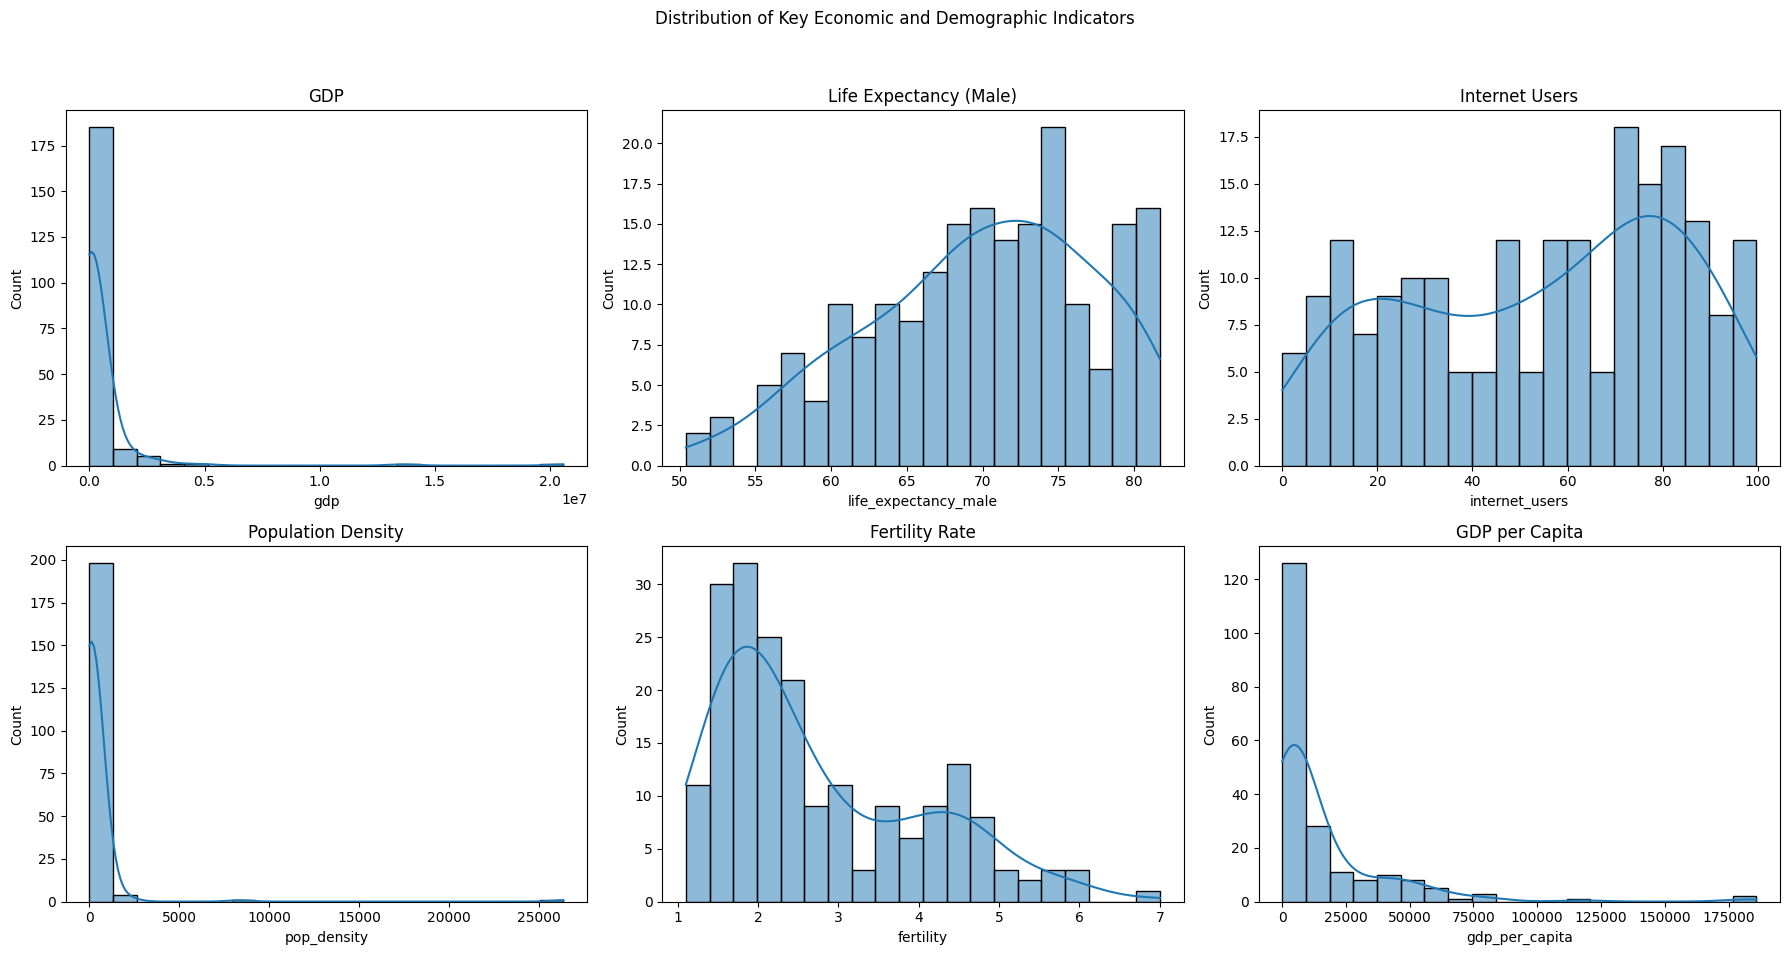

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Economic and Demographic Indicators')

sns.histplot(data_cleaned['gdp'], bins=20, kde=True, ax=axes[0, 0]).set(title='GDP')
sns.histplot(data_cleaned['life_expectancy_male'], bins=20, kde=True, ax=axes[0, 1]).set(title='Life Expectancy (Male)')
sns.histplot(data_cleaned['internet_users'], bins=20, kde=True, ax=axes[0, 2]).set(title='Internet Users')
sns.histplot(data_cleaned['pop_density'], bins=20, kde=True, ax=axes[1, 0]).set(title='Population Density')
sns.histplot(data_cleaned['fertility'], bins=20, kde=True, ax=axes[1, 1]).set(title='Fertility Rate')
sns.histplot(data_cleaned['gdp_per_capita'], bins=20, kde=True, ax=axes[1, 2]).set(title='GDP per Capita')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

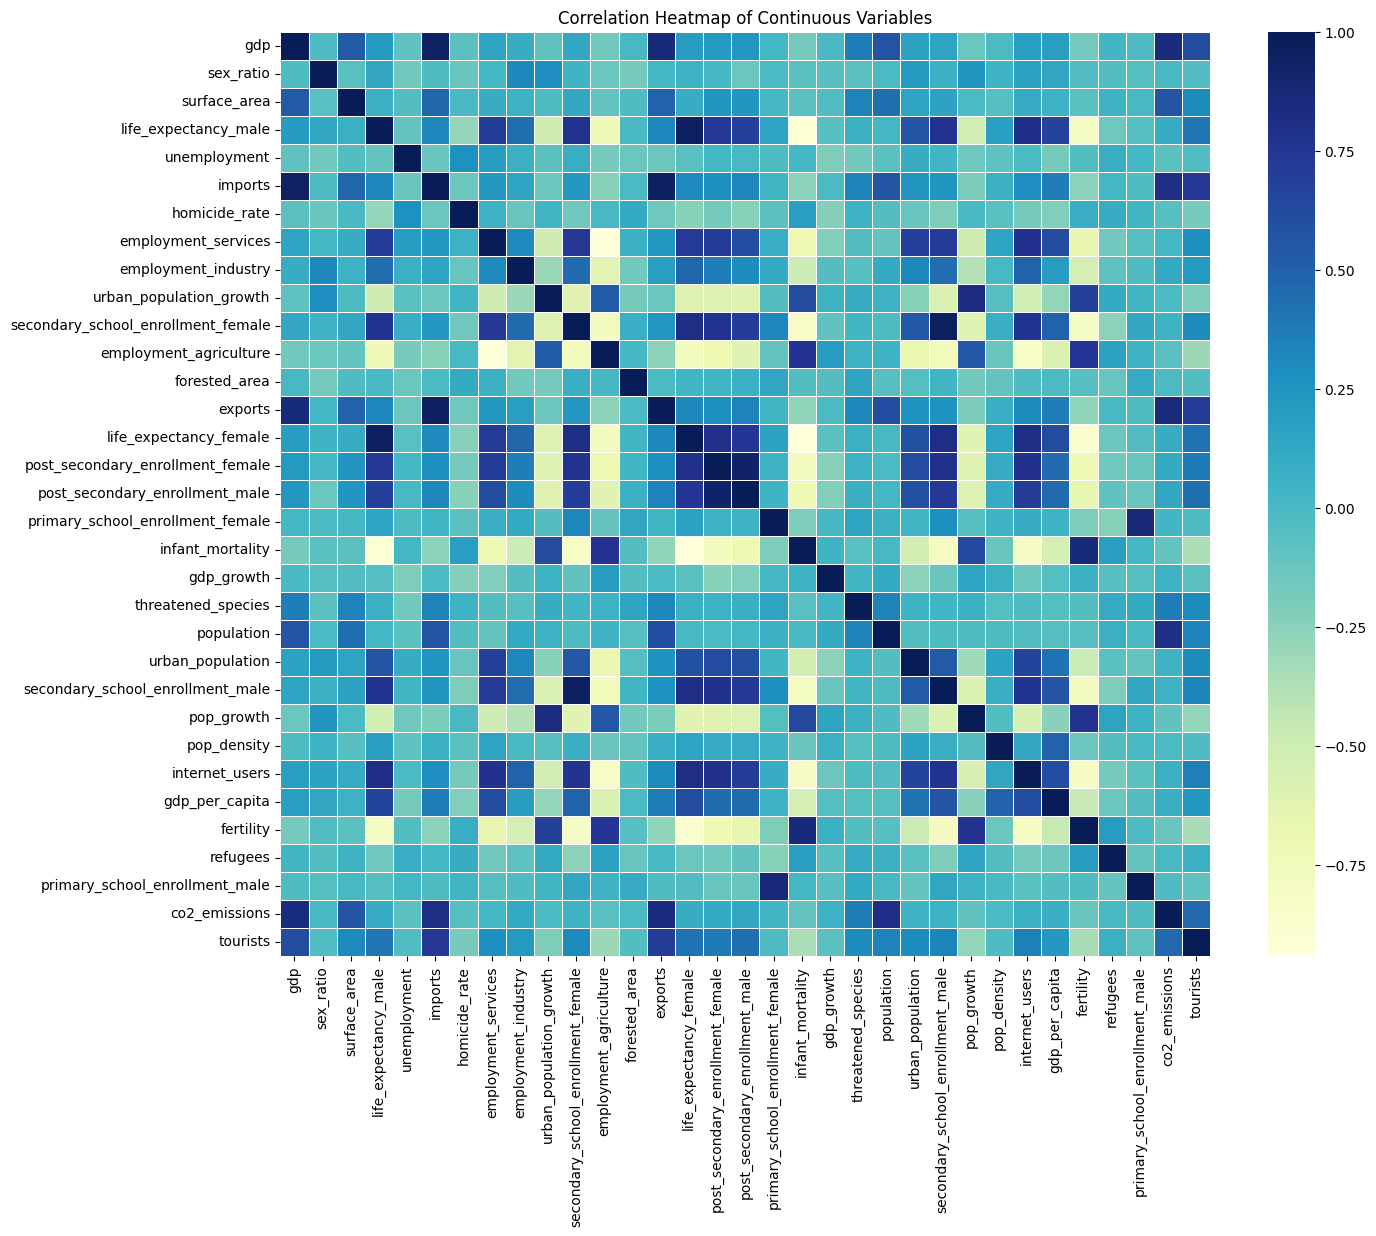

In [11]:
numeric_data = data_cleaned.select_dtypes(include='number')
plt.figure(figsize=(15, 12))
plt.title('Correlation Heatmap of Continuous Variables')
sns.heatmap(numeric_data.corr(), annot=False, cmap="YlGnBu", linewidths=0.5)
plt.show()

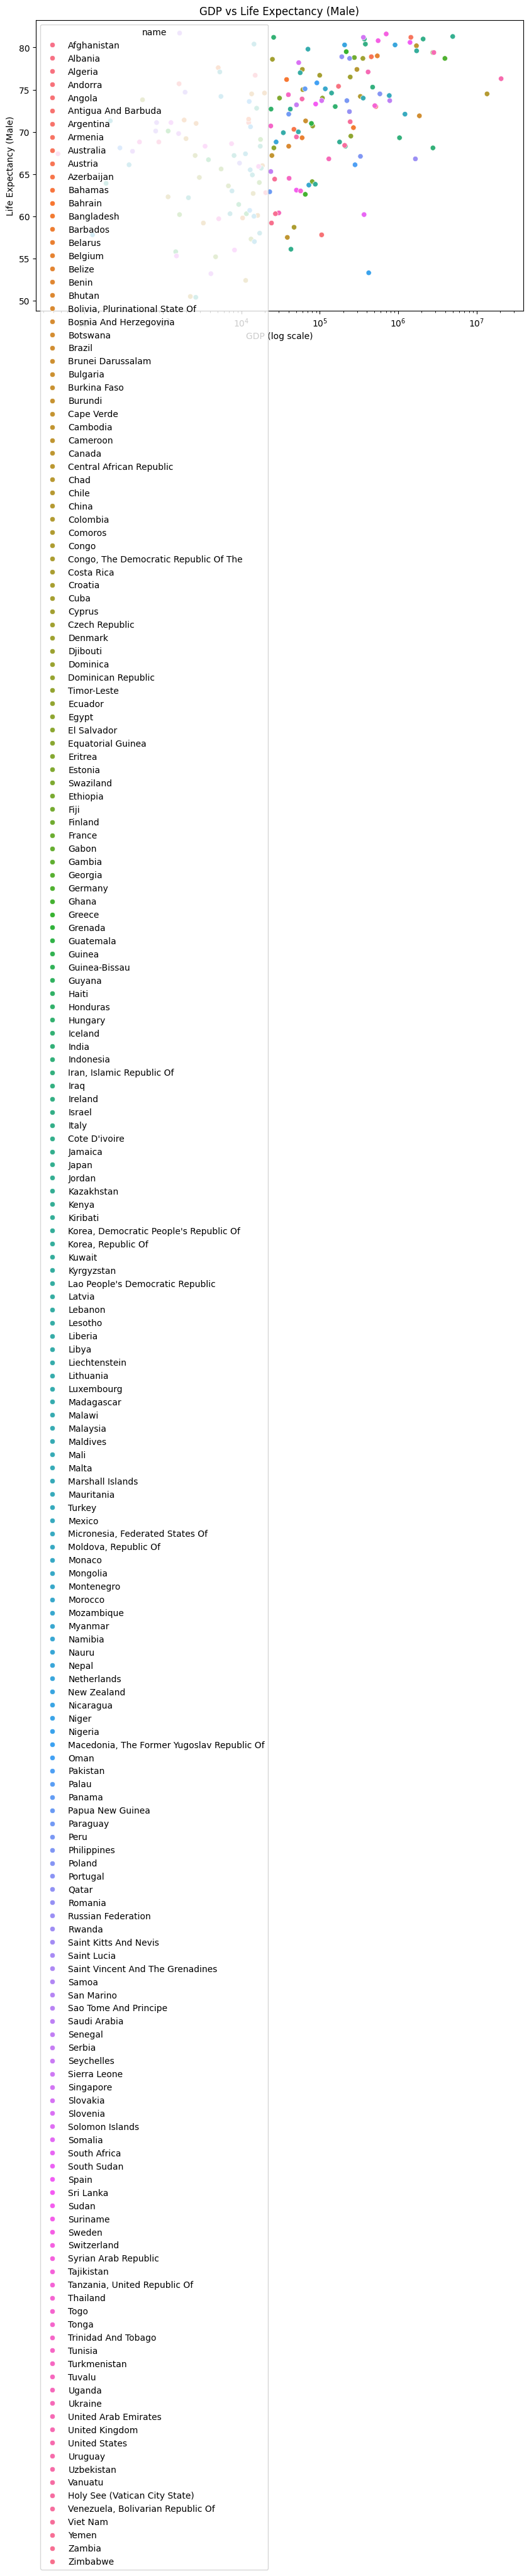

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp', y='life_expectancy_male', hue='name')
plt.title('GDP vs Life Expectancy (Male)')
plt.xscale('log')
plt.xlabel('GDP (log scale)')
plt.ylabel('Life Expectancy (Male)')
plt.show()

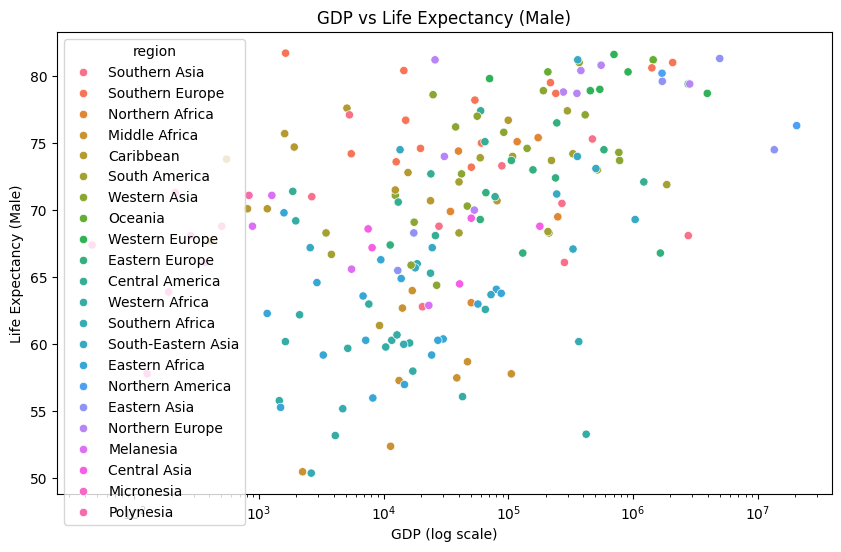

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp', y='life_expectancy_male', hue='region')
plt.title('GDP vs Life Expectancy (Male)')
plt.xscale('log')
plt.xlabel('GDP (log scale)')
plt.ylabel('Life Expectancy (Male)')
plt.show()

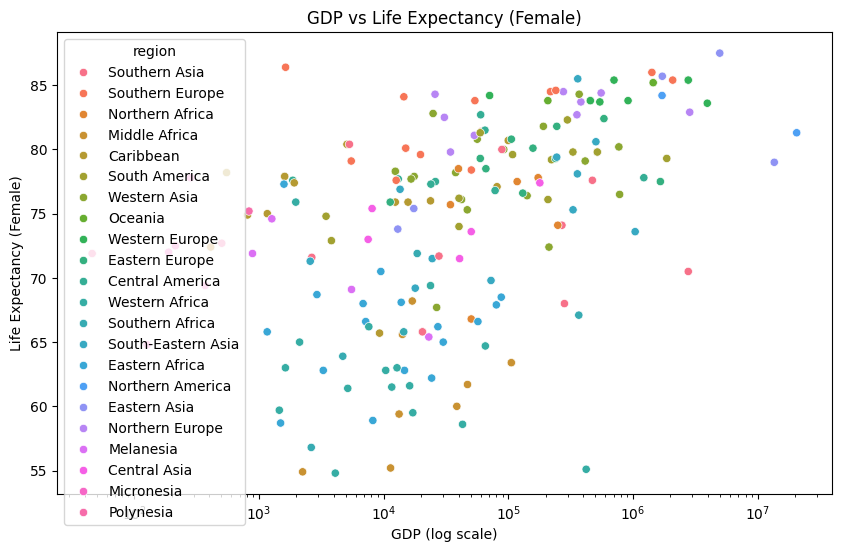

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp', y='life_expectancy_female', hue='region')
plt.title('GDP vs Life Expectancy (Female)')
plt.xscale('log')
plt.xlabel('GDP (log scale)')
plt.ylabel('Life Expectancy (Female)')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7144\510992886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='region', y='internet_users', palette='Set3')


Text(0, 0.5, 'Internet Users (%)')

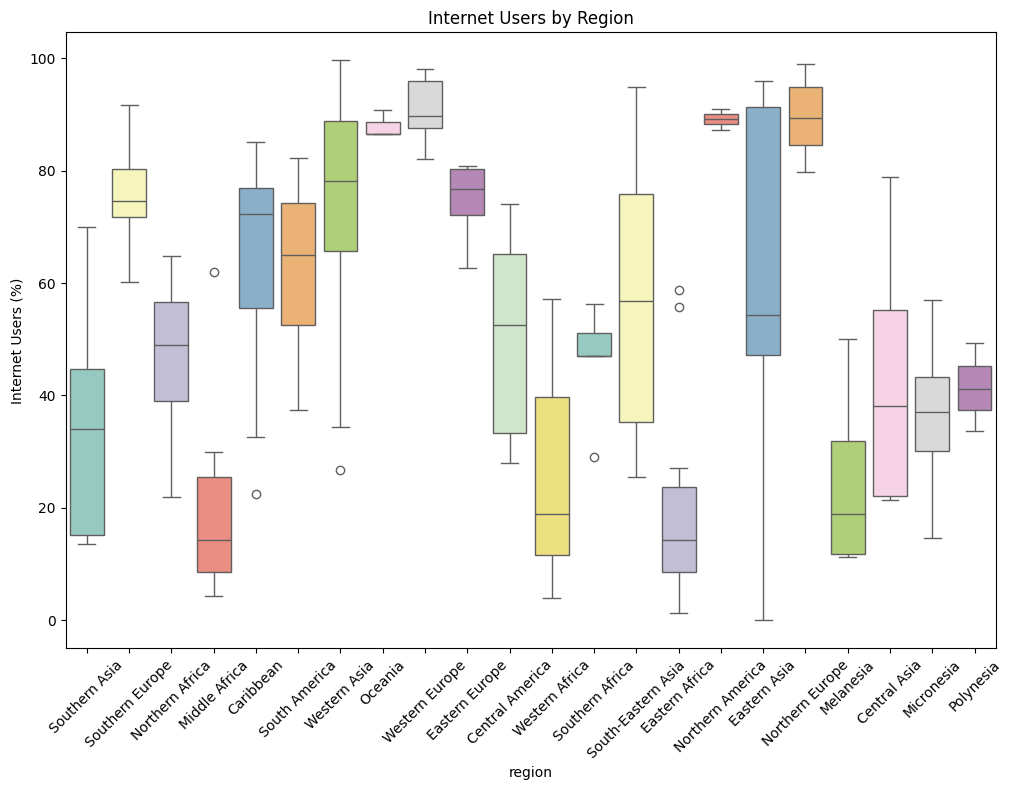

In [15]:
plt.figure(figsize=(12, 8))
plt.title('Internet Users by Region')
sns.boxplot(data=data_cleaned, x='region', y='internet_users', palette='Set3')
plt.xticks(rotation=45)
plt.ylabel('Internet Users (%)')

In [16]:
X = data_cleaned.drop(columns=['gdp','region'])
Y = data_cleaned['gdp']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
label_encoders = {}
for column in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le  # Store the encoders if you need to decode later

In [27]:
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_cat= CatBoostRegressor()
model_cat.fit(X_train_scaled, y_train)

# Make predictions for test data
y_pred_cat = model_cat.predict(X_test)

CatBoostError: Length of label=162 and length of data=163 is different.

In [30]:
# Evaluation
mse = mean_squared_error(y_test, y_pred_cat )
r2 = r2_score(y_test, y_pred_cat)
mape = mean_absolute_percentage_error(y_test, y_pred_cat)

print(f'MSE: {mse}, R²: {r2}, MAPE: {mape}')

NameError: name 'y_pred_cat' is not defined

In [31]:
mse = mean_squared_error(y_test, y_pred_cat)
rmse = np.sqrt(mse)
rmse

NameError: name 'y_pred_cat' is not defined

In [32]:
# Create a Random Forest Classifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [163, 162]